# Lesson 2 - Working with Pandas

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [4]:
#!pip install pandas

In [15]:
df = pd.read_csv("../data/enem.csv")

In [6]:
len(df)

2000

In [7]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# Proporção dos inscritos por idade

In [9]:
df["NU_IDADE"].value_counts(normalize = True)

18    0.1805
17    0.1500
19    0.1215
20    0.0885
21    0.0530
16    0.0500
22    0.0410
23    0.0340
24    0.0275
26    0.0265
25    0.0210
27    0.0205
30    0.0160
15    0.0160
28    0.0145
32    0.0120
29    0.0120
31    0.0095
33    0.0090
36    0.0090
39    0.0075
34    0.0075
35    0.0065
38    0.0065
37    0.0055
42    0.0055
41    0.0050
43    0.0045
44    0.0035
54    0.0035
49    0.0030
50    0.0030
52    0.0030
45    0.0030
46    0.0025
14    0.0020
40    0.0020
47    0.0020
48    0.0020
59    0.0020
53    0.0015
55    0.0015
64    0.0010
51    0.0010
56    0.0010
58    0.0005
62    0.0005
63    0.0005
65    0.0005
Name: NU_IDADE, dtype: float64

<AxesSubplot:>

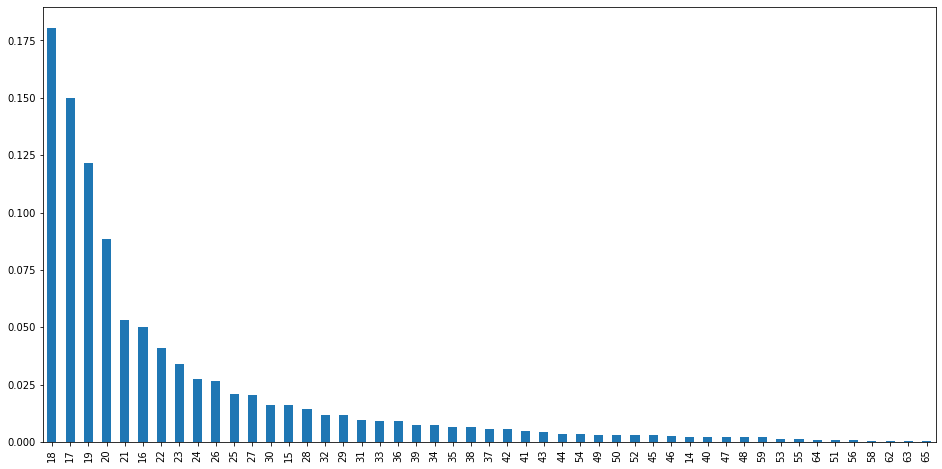

In [10]:
df["NU_IDADE"].value_counts(normalize = True).plot.bar(figsize=(16,8))

#pareto

# Proporção das cidades de residência dos alunos

<AxesSubplot:>

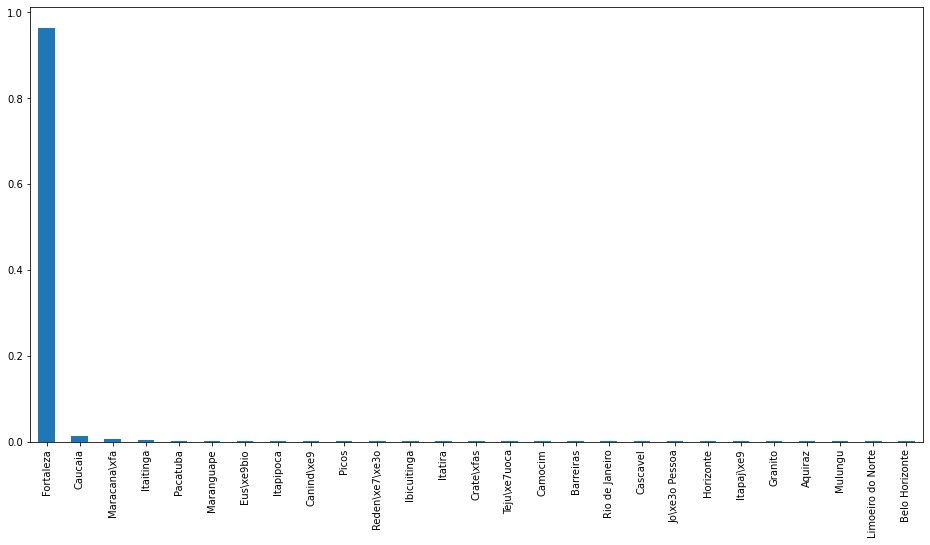

In [17]:
df["NO_MUNICIPIO_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))

In [18]:
renda_ord = df["Q006"].unique()
renda_ord.sort()
provas = ["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC"]

In [19]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

Text(0.5, 1.0, 'BoxPlot notas total por renda')

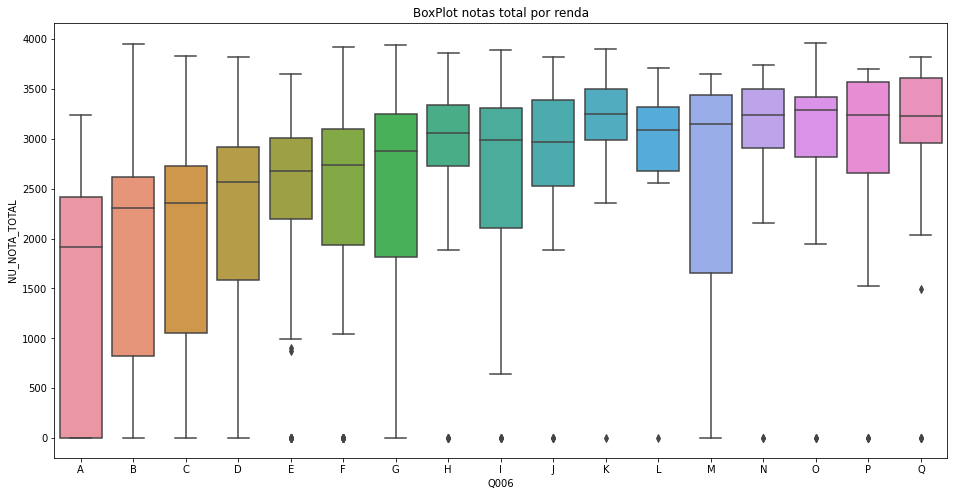

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data  = df, order = renda_ord )
plt.title("BoxPlot notas total por renda")

<Figure size 1440x432 with 0 Axes>

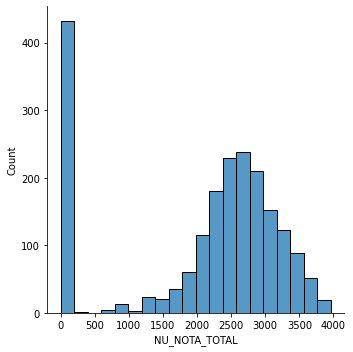

In [21]:
plt.figure(figsize=(20,6))
sns.displot(df, x = "NU_NOTA_TOTAL")

In [22]:
df_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")
df_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,cumpercentage,NU_NOTA_TOTAL
0,190005695347,2019,2304400,Fortaleza,23,CE,17,M,1,3,...,B,B,A,A,E,B,E,B,0.037863,2700.0
1,190003578437,2019,2304400,Fortaleza,23,CE,22,M,1,2,...,A,B,A,A,C,A,A,B,0.086862,1604.0
2,190002549374,2019,2304400,Fortaleza,23,CE,25,F,1,3,...,A,B,A,A,D,A,A,A,0.142542,2059.2
3,190005700665,2019,2304400,Fortaleza,23,CE,25,F,1,3,...,A,C,A,A,C,A,A,B,0.198223,2301.3
5,190003612639,2019,2304400,Fortaleza,23,CE,19,M,1,3,...,A,B,B,A,A,A,A,B,0.383082,1317.9


Text(0.5, 1.0, 'BoxPlot notas total por renda')

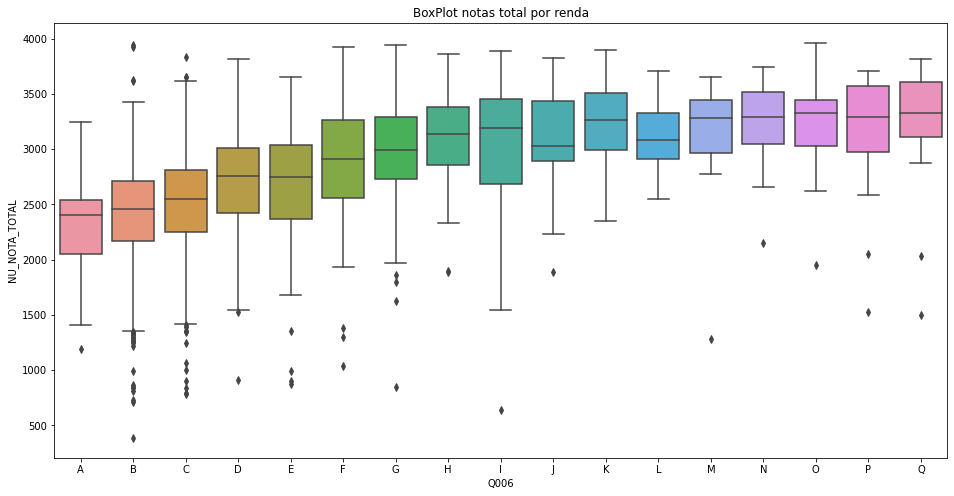

In [23]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data  = df_sem_notas_zero, order = renda_ord )
plt.title("BoxPlot notas total por renda")